### Описание проекта
Цель проекта — провести анализ анкет клиентов фитнес-центра «Культурист-датасаентист» и подготовить план действий по удержанию клиентов.<br><br>
Задачи:<br>
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:<br>
1) выделить целевые группы клиентов;<br>
2) предложить меры по снижению оттока;<br>
3) определить другие особенности взаимодействия с клиентами.<br>

### Описание данных
Данные клиента за предыдущий до проверки факта оттока месяц:<br>
* 'gender' — пол;<br>
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;<br>
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);<br>
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);<br>
* 'Phone' — наличие контактного телефона;<br>
* 'Age' — возраст;<br>
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).<br><br>
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:<br>
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);<br>
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);<br>
* 'Group_visits' — факт посещения групповых занятий;<br>
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;<br>
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;<br>
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.<br>
* 'Churn' — факт оттока в текущем месяце.

### Шаг 1. Загрузка данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools
import warnings; warnings.filterwarnings(action = 'ignore')
pd.set_option('chained_assignment', 'warn')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Загружаем датафрейм
df = pd.read_csv('/datasets/gym_churn.csv')

### Шаг 2. Исследовательский анализ данных

In [3]:
#Получаем информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
print('Количество дубликатов в таблице data: ', df.duplicated().sum())
print('Количество пропусков в таблице data: ', df.isnull().sum().sum())

Количество дубликатов в таблице data:  0
Количество пропусков в таблице data:  0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Исходная таблица содержит данные о 4000 клиентов фитнес-клуба. <br>
Распределение мужчин и женщин - примерно 50 на 50.<br>
Почти 85% клиентов живут или работают рядом с фитнес-клубом.<br>
49% клиентов - сотрудники компаний-партнёров клуба.<br>
30% пришли в клуб по акции "приведи друга".<br>
Клиенты клуб - люди в возрасте от 18 до 41 года. Средний возраст клиентов - 29 лет.<br>
41% клиентов посещает групповые занятия.<br>
Уровень оттока клиентов составляет 27%.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [6]:
#Выведем среднее значение по оттокам каждого признака
display(df.groupby('Churn').agg('mean').T)

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [7]:
#Получаем список названия колонок 
columns_name = list(df.columns)

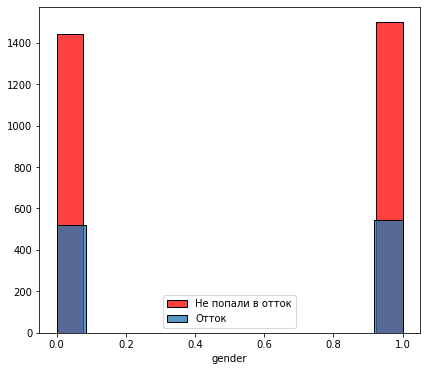

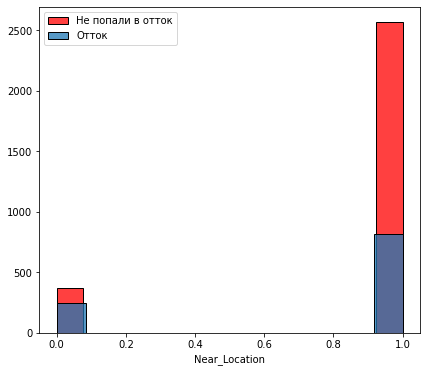

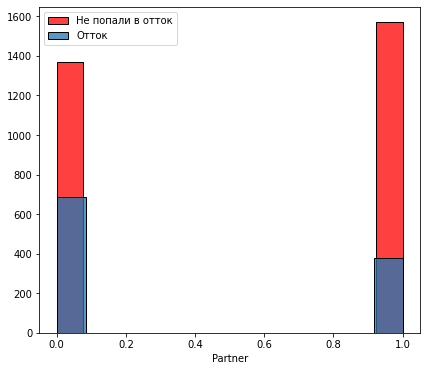

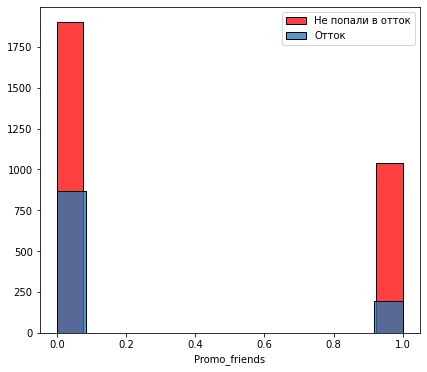

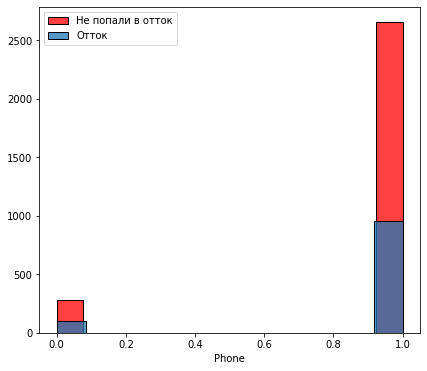

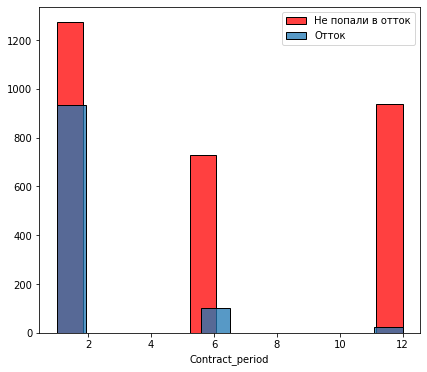

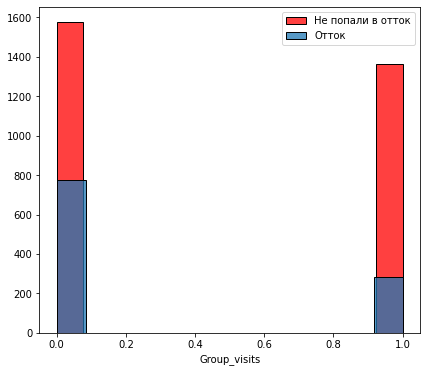

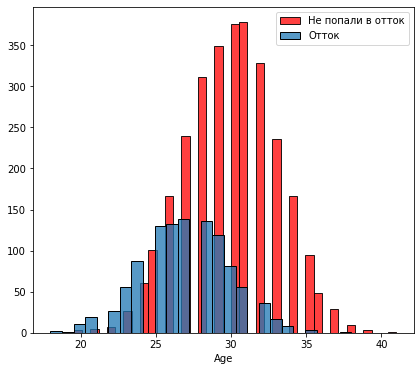

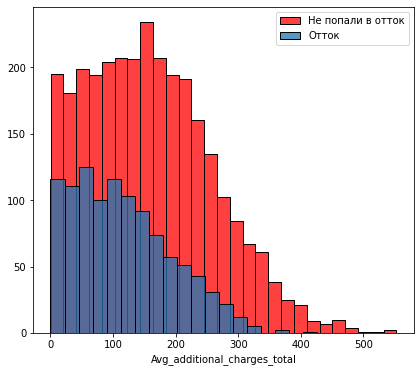

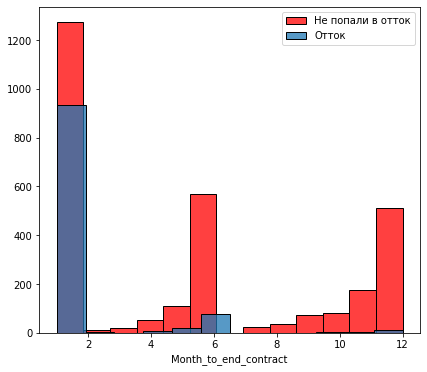

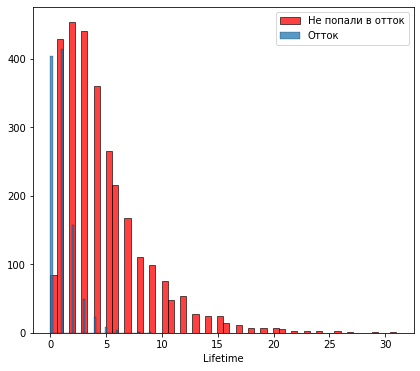

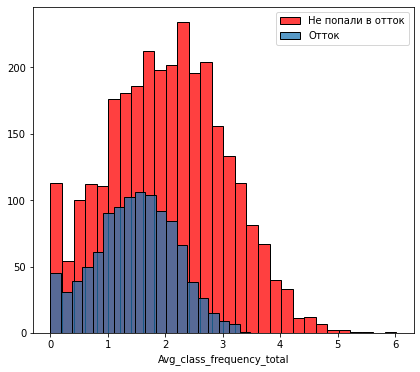

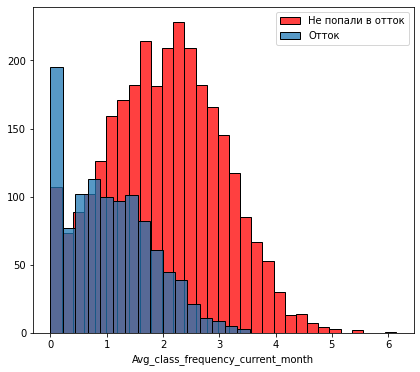

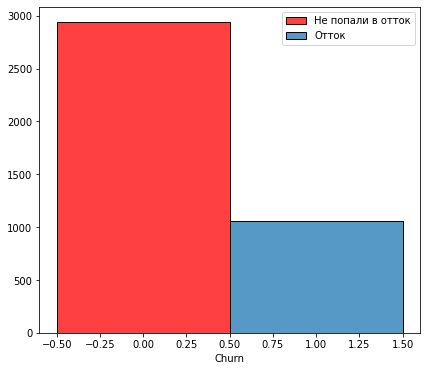

In [8]:
for column in columns_name:
    fig, ax = plt.subplots(figsize = (15, 6))
    sns.histplot(df[df['Churn']==0][column], label = 'Не попали в отток', ax = plt.subplot(1, 2, 1), color = 'Red')
    sns.histplot(df[df['Churn']==1][column], label = 'Отток', ax = plt.subplot(1, 2, 1))
    plt.xlabel(column)
    plt.ylabel('')
    plt.legend()

По характеру распределения значений признаков в двух группах ("отток" и "не отток"), можно выявить следующие закономерности: <br>
* уровень оттока меньше среди тех, кто живёт или работает рядом с клубом (87% не попавших в отток против 77%)<br>
* также больше оставшихся среди тех, кто работает в компаниях-партнёрах клуба (53% против 35%)<br>
* те, кто пришли по акции "приведи друга" остаются чаще (35% против 18%)
* те, кто ходит на групповые занятия, чаще не попадают в отток (46% против 27%)

Постоим матрицу корреляции

In [9]:
df.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


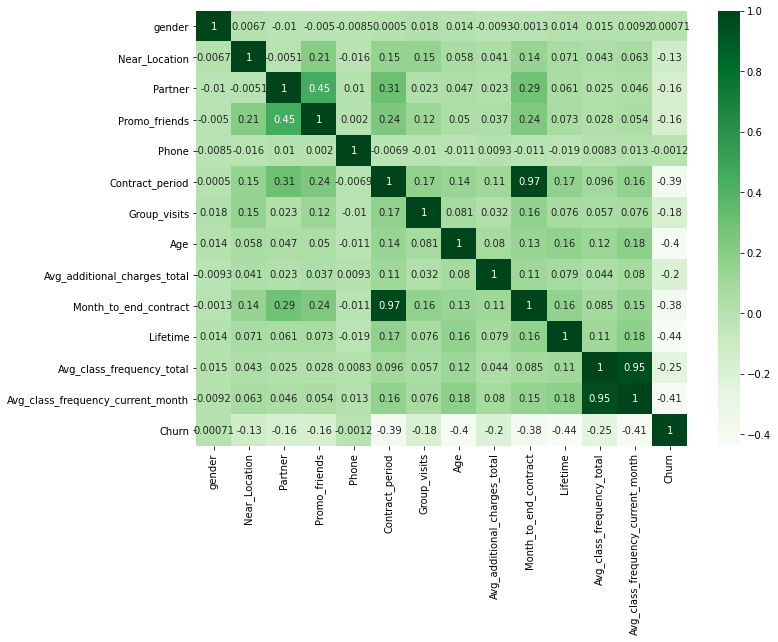

In [10]:
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), cmap="Greens",annot=True)
plt.show()

Ярко выраженной коррелиции факта оттока с другими признаками не выявлено. Выделяется влияние лайфтама (времени с момента преводо посещения клаба). Чем оно выше, тем ниже отток. Также можно выделить влияние Продолжительности абонемента (чем оно выше, тем ниже отток) и времени до окончания действия абонемента (чем больше, тем ниже отток).

### Шаг 3. Построение модели прогнозирования оттока клиентов

In [11]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

In [12]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
def print_all_metrics(y_true, y_pred, y_proba, mdoel, title='Метрики классификации - модель'):
    print(title, mdoel)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


In [14]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [23]:
#Создадим функцию для рбучения моделей и вывода информации о точности
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probabilities = model.predict_proba(X_test)[:, 1]
    print_all_metrics(y_test, y_pred, y_probabilities, m)
    print()

In [24]:
#Создадим список
models = [LogisticRegression(solver='liblinear', random_state=0),
          RandomForestClassifier(n_estimators = 100, random_state = 0),
         ]

In [27]:
for model in models:
    make_prediction(model, X_train, y_train, X_test, y_test)

Метрики классификации - модель LogisticRegression(random_state=0, solver='liblinear')
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83

Метрики классификации - модель RandomForestClassifier(random_state=0)
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82



Обе модели показали высокий уровень точности. Логистическая регрессия оказалась чуть более точной.

### Шаг 4. Кластеризация клиентов

In [35]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(X)

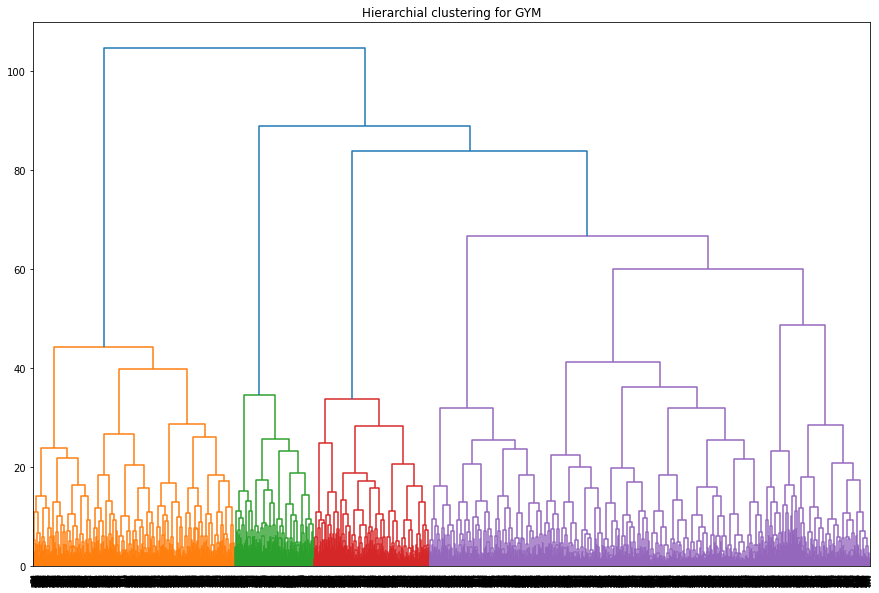

In [36]:
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

In [37]:
km =  KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)

In [38]:
df['cluster'] = labels

In [56]:
clusters = df.groupby(['cluster']).mean().T
clusters

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
Near_Location,0.959406,0.862338,0.000000,1.000000,0.976134
Partner,0.783168,0.470130,0.463366,0.350238,0.356802
Promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
Phone,1.000000,0.000000,1.000000,1.000000,0.998807
Contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
Group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
Age,29.982178,29.301299,28.477228,28.167987,30.125298
Avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
Month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


In [46]:
print('Размеры кластеров:')
display(df['cluster'].value_counts())

Размеры кластеров:


3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

Мы поделили клиентов на 5 кластеров. Размеры кластеров значительно отличаются (от 385 до 1262 клиентов в кластере). <br>
На основе средних значений признаков самым надёжным кажется кластер №0 (1010 клиентов) с долей оттока в 2%.<br>
Характерные черты для клиентов этого кластера:<br>
* 96% живут или работают рядом с клубом
* 78% - сотрудники компаний-партнёров клуба (значительно выше, чем в других кластерах)
* 57% пришли по акции "приведи друга" (минимум в 2 раза больше, чем в других кластерах)
* 100% оставили свой телефон
* 54% посещают групповые занятия (выше, чем в других кластерах)
* средняя продолжительность абонемента = 10+ месяцев (в других кластерах - 4.7 и ниже!)<br><br>

Вторым по уровню надёжности с долей оттока в 7% является кластер №4, в который входят 838 клиентов.<br>
Характерные для этого кластера признаки:
* также как и в кластере 0 высок процент тех, кто живет или работает рядом с клубом - 97%.
* всего 36% клиентов пришли из компаний-партнёров (значительно меньше, чем в кластере 0)
* только 23% пришли по акции "приведи друга" (значительно меньше, чем в кластере 0)
* средняя продолжительность абонемента - 2.7 месяцев (значительно меньше, чем в кластере 0)
* остальные показатели существенно не отличаются от самого надёжного кластера<br><br>

В трёх оставшихся кластерах уровень оттока ощутимо выше, чем в двух упомянутых выше. Рассмотрим основные отличительные черты.<br>
Кластер №1: уровень оттока 27%, включает в себя 385 клиентов:<br>
* 86% клиентов живут или работают рядом с клубом
* 47% клиентов - сотрудники компаний-партнёров
* 30% пришли по акции "приведи друга"
* никто из клиентов не указал своё номер телефона (в остальных кластерах указали все или почти все)
* средняя продолжительность договора - 4.7 месяцев<br><br>
Кластер №2: уровень оттока 44%, 505 клиентов:
* никто из клиентов не живёт и не работает рядом с клубом (в остальных кластерах значение близко к 100%)
* самый низкий процент пришедших по акции "приведи друга" - 7%
* клиенты из этого кластера меньше остальных посещаются групповые занятия - 22%<br><br>
Кластер №3: самый высокий уровень оттока - 51%, при этом самый многочисленный - 1262 клиента:
* самая короткая средняя продолжительность приобретенных абонементов - 1.9 месяца
* самая никзая доля тех, кто пришёл по акции приведи друга или работает в компании партнёре (24% и 35% соответственно)
* низкая доля посещающих групповые занятий - 34%

### Шаг 5. Выводы и базовые рекомендации по работе с клиентами

Исследование проводилось на основе данных о 4000 клиентов фитнес-клуба "Культурист-датасаентист". <br>
Что стало известно о клиентах?<br>
Распределение мужчин и женщин - примерно 50 на 50.<br>
Почти 85% клиентов живут или работают рядом с фитнес-клубом.<br>
49% клиентов - сотрудники компаний-партнёров клуба.<br>
30% пришли в клуб по акции "приведи друга".<br>
Клиенты клуб - люди в возрасте от 18 до 41 года. Средний возраст клиентов - 29 лет.<br>
41% клиентов посещает групповые занятия.<br><br>
Уровень оттока клиентов составляет 27%.<br>
Проведя анализ взаимосвязей признаков и их влияния на уровень оттока, удалось выявить, что гораздо чаще остаются те клиенты, которые:<br>
* живут или работают рядом с клубом
* работают в компаниях-партнёрах клуба
* пришли по акции "приведи друга"
* посещают групповые занятия
* приобретаюь абонемент на длительный срок (более 6 месяцев)<br><br>

Исходя из этого рекоммендации, которые можно предложить для снижения уровня оттока клиентов:<br>
* привлечение тех клиентов, кто живёт или работает рядом с клубом (реклама, ориентированная именно на них)
* более активное привлечение клиентов из компаний-партнёров и поиск новых компаний-партнёров
* продвижение групповых занятий для привлечения туда большего количества клиентов (здесь может понадобиться доплнительное исследование: почему не ходят на занятия? что сделать, чтобы ходили? возможно, просто не хватает информационно продвижения или же нужно разнообразить программу групповых занятий с учётом потребностей клиентов)
* продвигать акцию "приведи друга"
* мотивировать клиентов приобретать абонементы на длительный срок (промо-акции, скидки на продление)
